Running World Without Us scenarios for SSP 585 with AR6 scaling factors

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward2 import fair_scm
from fair.forward import fair_scm
from fair.forward3 import fair_scm
from fair.ancil import natural_hist
from fair.ancil import cmip6_solar_hist
from fair.ancil import cmip6_volcanic_hist


In [2]:
SSPs = pd.read_csv("/Users/michelledvorak/Documents/2020 RA'ship/rcmip-emissions-annual-means-v4-0-0.csv")

In [3]:
SSPs_scenario = SSPs['Scenario'].str.contains('ssp')
SSPs_only = SSPs[SSPs_scenario]

SSPs_region = SSPs_only['Region'].str.contains('R5.2')
SSPs_world = SSPs_only[~SSPs_region]

# SSPs_world

In [4]:
sums_only = SSPs_world.loc[:,'Variable'].str.contains('MAGICC')
SSPs = SSPs_world[~sums_only]

In [5]:
del SSPs['Region']
del SSPs['Activity_Id']
del SSPs['Mip_Era']


In [6]:
SSP_119 = SSPs.loc[:,'Scenario'].str.contains('ssp119')
SSP_119 = SSPs[SSP_119]

SSP_126 = SSPs.loc[:,'Scenario'].str.contains('ssp126')
SSP_126 = SSPs[SSP_126]

SSP_245 = SSPs.loc[:,'Scenario'].str.contains('ssp245')
SSP_245 = SSPs[SSP_245]

SSP_370 = SSPs.loc[:,'Scenario'].str.contains('ssp370')
SSP_370 = SSPs[SSP_370]

SSP_434 = SSPs.loc[:,'Scenario'].str.contains('ssp434')
SSP_434 = SSPs[SSP_434]

SSP_460 = SSPs.loc[:,'Scenario'].str.contains('ssp460')
SSP_460 = SSPs[SSP_460]

SSP_534_os = SSPs.loc[:,'Scenario'].str.contains('ssp534-over')
SSP_534_os = SSPs[SSP_534_os]

SSP_585 = SSPs.loc[:,'Scenario'].str.contains('ssp585')
SSP_585 = SSPs[SSP_585]

In [7]:
# SSP_119

In [8]:
model_list = [SSP_119, SSP_126, SSP_245, SSP_370, SSP_434, SSP_460, SSP_534_os, SSP_585]
empty_list = []
empty_list_2 = []

for model in model_list:
    model = model.groupby('Variable').mean()
    model = model.T
    model.loc[:,'Year'] = model.index
    model.loc[:,'Year'] = model.loc[:,'Year'].astype(int)
#     model.loc[:,'Year2'] = model.loc[:,'Year']
    model.drop(model[model.Year < 1765].index, inplace=True)
#     model.drop(model[model.Year > 2160].index, inplace=True)
#     model.loc[:,'Year'] = pd.to_datetime(model['Year'], format='%Y')
    model.index = model['Year']
#     model = model.resample('Y').mean()
    model = model.interpolate(method ='linear', limit_direction ='forward')
    empty_list.append(model)
    
    for col_name in model.columns:
        empty_list_2.append(col_name)
    

In [9]:
SSP_119 = empty_list[0]
SSP_126 = empty_list[1]
SSP_245 = empty_list[2]
SSP_370 = empty_list[3]
SSP_434 = empty_list[4]
SSP_460 = empty_list[5]
SSP_534_os = empty_list[6]
SSP_585 = empty_list[7]

# type = DataFrame

In [10]:
# empty_list_2[0:51]

In [11]:
nt = len(SSP_119)
nt

736

In [12]:
emissions_119 = np.zeros((nt,40))
emissions_126 = np.zeros((nt,40))
emissions_245 = np.zeros((nt,40))
emissions_370 = np.zeros((nt,40))
emissions_434 = np.zeros((nt,40))
emissions_460 = np.zeros((nt,40))
emissions_534_os = np.zeros((nt,40))
emissions_585 = np.zeros((nt,40))

array_list = [emissions_119, 
              emissions_126, 
              emissions_245, 
              emissions_370, 
              emissions_434, 
              emissions_460, 
              emissions_534_os, 
              emissions_585]

SSP_list = [SSP_119, 
            SSP_126, 
            SSP_245, 
            SSP_370, 
            SSP_434, 
            SSP_460, 
            SSP_534_os, 
            SSP_585]

In [13]:
empty_list = []

for array, SSP in zip(array_list, SSP_list):
    array[:,0] = SSP['Year']
    array[:,1] = (SSP['Emissions|CO2'])/1000/3.67 # MtCO2 to GtC
    array[:,3] = SSP['Emissions|CH4']
    array[:,4] = (SSP['Emissions|N2O'])/1000/1.57 #ktN2O to MtN
    array[:,5] = (SSP['Emissions|Sulfur'])/1.998 #MtSO2 to MtS
    array[:,6] = SSP['Emissions|CO']
    array[:,7] = SSP['Emissions|VOC']
    array[:,9] = SSP['Emissions|BC']
    array[:,10] = SSP['Emissions|OC']
    array[:,11] = SSP['Emissions|NH3']/1.217 #MtNH3 to MtN
    array[:,12] = SSP['Emissions|F-Gases|PFC|CF4']
    array[:,13] = SSP['Emissions|F-Gases|PFC|C2F6']
    array[:,14] = SSP['Emissions|F-Gases|PFC|C6F14']
    array[:,15] = SSP['Emissions|F-Gases|HFC|HFC23']
    array[:,16] = SSP['Emissions|F-Gases|HFC|HFC32']
    array[:,17] = SSP['Emissions|F-Gases|HFC|HFC4310mee']
    array[:,18] = SSP['Emissions|F-Gases|HFC|HFC125']
    array[:,19] = SSP['Emissions|F-Gases|HFC|HFC134a']
    array[:,20] = SSP['Emissions|F-Gases|HFC|HFC143a']
    array[:,21] = SSP['Emissions|F-Gases|HFC|HFC227ea']
    array[:,22] = SSP['Emissions|F-Gases|HFC|HFC245fa']
    array[:,23] = SSP['Emissions|F-Gases|SF6']
    array[:,24] = SSP['Emissions|Montreal Gases|CFC|CFC11']
    array[:,25] = SSP['Emissions|Montreal Gases|CFC|CFC12']
    array[:,26] = SSP['Emissions|Montreal Gases|CFC|CFC113']
    array[:,27] = SSP['Emissions|Montreal Gases|CFC|CFC114']
    array[:,28] = SSP['Emissions|Montreal Gases|CFC|CFC115']
    array[:,29] = SSP['Emissions|Montreal Gases|CCl4']
    array[:,30] = SSP['Emissions|Montreal Gases|CH3CCl3']
    array[:,31] = SSP['Emissions|Montreal Gases|HCFC22']
    array[:,32] = SSP['Emissions|Montreal Gases|HCFC141b']
    array[:,33] = SSP['Emissions|Montreal Gases|HCFC142b']
    array[:,34] = SSP['Emissions|Montreal Gases|Halon1211']
    array[:,35] = SSP['Emissions|Montreal Gases|Halon1202']
    array[:,36] = SSP['Emissions|Montreal Gases|Halon1301']
    array[:,37] = SSP['Emissions|Montreal Gases|Halon2402']
    array[:,38] = SSP['Emissions|Montreal Gases|CH3Br']
    array[:,39] = SSP['Emissions|Montreal Gases|CH3Cl']
    
    empty_list.append(array)

In [14]:
emissions_119 = empty_list[0]
emissions_126 = empty_list[1]
emissions_245 = empty_list[2]
emissions_370 = empty_list[3]
emissions_434 = empty_list[4]
emissions_460 = empty_list[5]
emissions_534_os = empty_list[6]
emissions_585 = empty_list[7]

In [15]:
natural = fair.ancil.natural.Emissions.emissions
natural_2 = fair.ancil.natural_2.Emissions.emissions

Create AR6 scaling factors by running FaIR with SSP historical data with NO AR5 scaling

In [16]:
C585, F585, T585, _ = fair.forward3.fair_scm(emissions=emissions_585, # mean values for lam, eps, gam Geo v2!
                                             lam=1.18, 
                                             eps=1.28, 
                                             gam=0.67, 
                                             scaleAerosolAR5=False,
                                             natural=natural_2)
#                                              scaleHistoricalAR5=True)

In [17]:
F_1765 = [F585[0,0], F585[0,1], F585[0,2], F585[0,8]]
F_1880 = [F585[115,0], F585[115,1], F585[115,2], F585[115,8]]
F_2016 = [F585[251,0], F585[251,1], F585[251,2], F585[251,8]]
F_2018 = [F585[253,0], F585[253,1], F585[253,2], F585[253,8]]

F_2018[0] - F_1765[0]

2.08759279087221

World Without Us Scenarios: return to pre-industrial (1765) emissions levels for primary gases

In [18]:
natural_2 = fair.ancil.natural_2.Emissions.emissions

In [19]:
# find pre-industrial (1765) emissions levels for CO2, CH4, N2O, VOCs, OCs, BCs, CO and Sulfur

CO2_pre = emissions_585[0,1]  # CO2
CH4_pre = emissions_585[0,3]  # CH4
N2O_pre = emissions_585[0,4]
Sulfur_pre = emissions_585[0,5]
CO_pre = emissions_585[0,6]
VOC_pre = emissions_585[0,7]
BC_pre = emissions_585[0,9]
OC_pre = emissions_585[0,10]
NH3_pre = emissions_585[0,11]
CF4_pre = emissions_585[0,12]
CH3Br_pre = emissions_585[0,38]
CH3Cl_pre = emissions_585[0,39]

In [20]:
#2021 = year 256
#2018 = year 253

#anthropogenic emissions of CH4 and N2O are pre-ind.
#are natural emissions already accounted for in SSPs?

# WWU beginning next year (2021)
emissions1 = np.zeros((nt, 40))
emissions1[:256,:] = emissions_585[0:256,:]
emissions1[256:,0] = emissions_585[256:,0]
emissions1[256:,1] = CO2_pre
emissions1[256:,3] = CH4_pre
emissions1[256:,4] = N2O_pre
emissions1[256:,5] = Sulfur_pre
emissions1[256:,6] = CO_pre
emissions1[256:,7] = VOC_pre
emissions1[256:,9] = BC_pre
emissions1[256:,10] = OC_pre
emissions1[256:,11] = NH3_pre
emissions1[256:,12] = CF4_pre
emissions1[256:,38] = CH3Br_pre
emissions1[256:,39] = CH3Cl_pre

In [21]:
import scipy as sci

# AR6 reported 90% confidence interval

CO2_95 = np.array([1.89, 2.15, 2.41])
CH4_95 = np.array([0.43, 0.54, 0.65])
N2O_95 = np.array([0.16, 0.19, 0.22])
aerosols_95 = np.array([-0.4, -1.1, -2.0])
lamda = np.array([0.570, 1.18, 1.79])
epsilon = np.array([0.868, 1.28, 1.69])
gamma = np.array([0.423, 0.67, 0.918])

# calculate standard deviation, s, from C.I. and mean:

CO2_s = (CO2_95[2] - CO2_95[1])/1.65
CH4_s = (CH4_95[2] - CH4_95[1])/1.65
N2O_s = (N2O_95[2] - N2O_95[1])/1.65
aerosols_s = np.abs((aerosols_95[2] - aerosols_95[1])/1.65+(aerosols_95[1] - aerosols_95[0])/1.65)/2

# standard deviation for lambda, epsilon and gamma from Geo v2

lam_s = 0.3697
eps_s = 0.2485
gam_s = 0.1503

Generate Gaussian distributions of CO2, methane, nitrous oxide and aerosol radiative forcing using AR6 means and s.d.; do the same for climate feedback parameters using Geoffrey v.2

In [22]:
from scipy import stats

CO2_norm = stats.norm.rvs(size=1000, loc=CO2_95[1], scale=CO2_s, random_state=3970)
CH4_norm = stats.norm.rvs(size=1000, loc=CH4_95[1], scale=CH4_s, random_state=53060)
N2O_norm = stats.norm.rvs(size=1000, loc=N2O_95[1], scale=N2O_s, random_state=1532)
aerosols_norm = stats.norm.rvs(size=1000, loc=aerosols_95[1], scale=aerosols_s, random_state=888955)

CO2_scale = CO2_norm/(F_2018[0] - F_1765[0])
CH4_scale = CH4_norm/(F_2018[1] - F_1765[1])
N2O_scale = N2O_norm/(F_2018[2] - F_1765[2])
aerosols_scale = aerosols_norm/(F_2018[3] - F_1765[3])

scale_norm = np.ones((1000, 13))

scale_norm[:, 0] = CO2_scale
scale_norm[:, 1] = CH4_scale
scale_norm[:, 2] = N2O_scale
scale_norm[:, 8] = aerosols_scale

lam_norm = stats.norm.rvs(size=1000, loc=lamda[1], scale=lam_s, random_state=1750)
eps_norm = stats.norm.rvs(size=1000, loc=epsilon[1], scale=eps_s, random_state=52000)
gam_norm = stats.norm.rvs(size=1000, loc=gamma[1], scale=gam_s, random_state=63990)

In [23]:
# check if variable distributions accurately predict the mean values

print(abs(CO2_95[1] - np.mean(CO2_norm)) < 0.01)
print(abs(CH4_95[1] - np.mean(CH4_norm)) < 0.01)
print(abs(N2O_95[1] - np.mean(N2O_norm)) < 0.01)
print(abs(aerosols_95[1] - np.mean(aerosols_norm)) < 0.01)

True
True
True
False


In [24]:
import seaborn as sns

In [25]:
# generate the ensemble

T = np.zeros((736,1000))
F = np.zeros((736,13,1000))
# C = np.zeros((736,31,10000))
N = np.zeros((736,1000))
T_mean = np.zeros(736,)
T_std = np.zeros(736,)

for i in range(1000):
    _, F[:,:,i], T[:,i], N[:,i] = fair.forward3.fair_scm(emissions=emissions1, 
                                      eps = eps_norm[i], #mean feedback parameters to be consistent with scaling factors
                                      lam = lam_norm[i],
                                      gam = gam_norm[i],
                                      scale = scale_norm[i,:],
#                                      F2x = 3.71*scale_norm[i,0], removed due to redunancy
                                      natural=natural_2,
                                      scaleAerosolAR5=False)
for i in range(736):
    T_mean[i] = T[i,:].mean()
    T_std[i] = T[i,:].std()

In [26]:
T.std()

0.7292153277152353

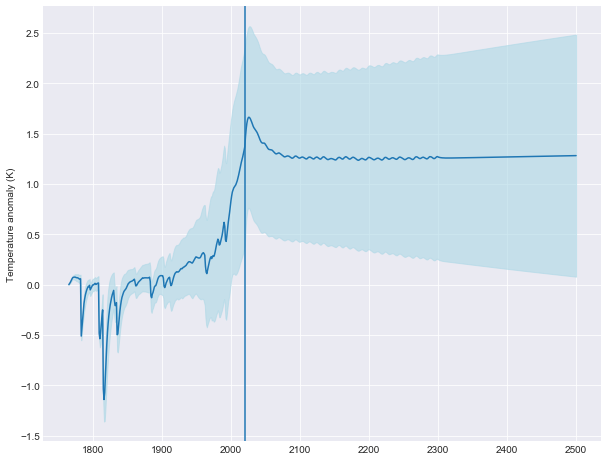

In [27]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10,8)

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(SSP_585.index, T_mean)
error = 2*T_std
ax1.fill_between(SSP_585.index, T_mean+error, T_mean-error, alpha=0.6, color='lightblue')
ax1.axvline(x=SSP_585.index[256])
ax1.set_ylabel('Temperature anomaly (K)');

In [28]:
# sanity checks on variable inputs and model outputs for CO2 forcing

print(F[253,0,:].std())
print(F[253,0,:].mean())
print(F[253,0,:].max())
print()
print(CO2_norm.max())

0.18360121190805045
2.1873953107658743
2.8049798410715416

2.6849761073702845


Bayesian updating step that constrains temperature, heat uptake and radiative forcing by observational means

In [30]:
constrained_2 = np.zeros(1000, dtype=bool)

def constrain(T_model, T_model_2, N_model, F_model, sigma_T, sigma_T_2, sigma_N, sigma_F):
    return np.sqrt(((T_model-0.99)/sigma_T)**2 + 
                   ((T_model_2-0.7)/sigma_T_2)**2 +
                   ((N_model-0.61)/sigma_N)**2 + 
                   ((F_model-1.97)/sigma_F)**2) < 1.65

for i in range(1000):
    # we use observed trends from 1850-1900 and 2006-2018, plus 1970-1980 and 2008-2018
    T_model = T[2006-1765:2018-1765,i].mean() - T[1850-1765:1900-1765,i].mean()
    T_model_2 = T[2008-1765:2018-1765,i].mean() - T[1970-1765:1980-1765,i].mean()
    N_model = N[2006-1765:2018-1765,i].mean() - N[1850-1765:1900-1765,i].mean()
    F_model = np.sum(F[2006-1765:2018-1765,:,i], axis=1).mean() - np.sum(F[1850-1765:1900-1765,:,i], axis=1).mean()
    constrained_2[i] = constrain(T_model,
                                 T_model_2,
                                 N_model, 
                                 F_model, 
                                 sigma_T=0.05454,
                                 sigma_T_2=0.1,
                                 sigma_N=0.1818, 
                                 sigma_F=0.3697)

print('%d ensemble members passed observational constraint' % np.sum(constrained_2))

T_mean_c = np.zeros(736,)
T_std_c = np.zeros(736,)

for i in range(736):
    T_mean_c[i] = T[i,constrained_2].mean()
    T_std_c[i] = T[i,constrained_2].std()

94 ensemble members passed observational constraint


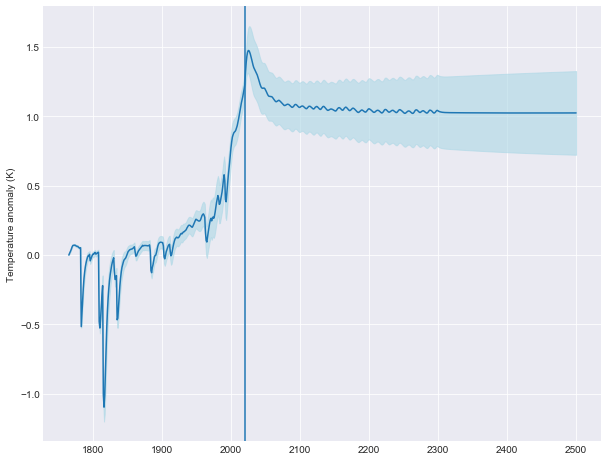

In [31]:
# What does this do to the ensemble?
plt.rcParams['figure.figsize'] = (10,8)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(SSP_585.index, T_mean_c)
error = 2*T_std_c
ax1.fill_between(SSP_585.index, T_mean_c+error, T_mean_c-error, alpha=0.6, color='lightblue')
ax1.axvline(x=SSP_585.index[256])
ax1.set_ylabel('Temperature anomaly (K)');

In [41]:
# plt.style.use('seaborn-darkgrid')
# plt.rcParams['figure.figsize'] = (16,8)

# fig = plt.figure()
# ax1 = fig.add_subplot(221)
# ax1.set_xlabel('Radiative forcing (W m-2)')
# ax1.plot(SSP_585.index, F[:, 0, constrained_2]);

Compare the priors (distributions of each variable) with the posteriors for forcing variables derived from the Bayesian method

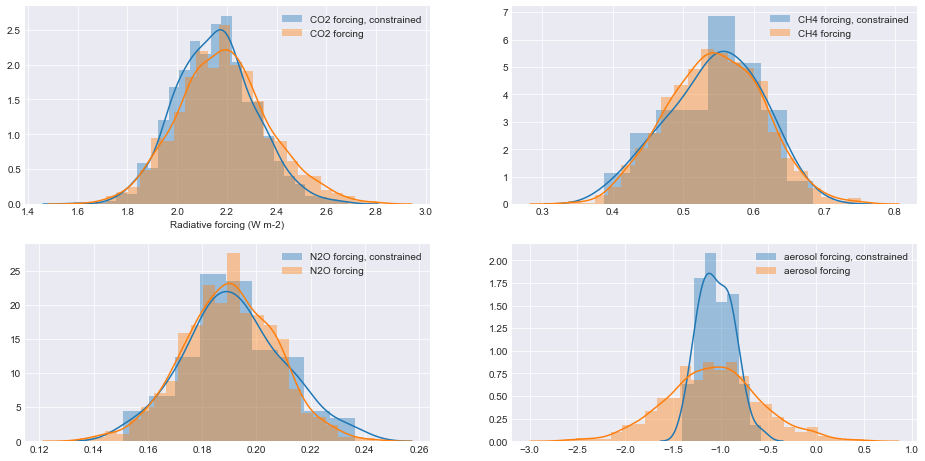

In [33]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16,8)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_xlabel('Radiative forcing (W m-2)')

# sns.distplot(F[253, 0, constrained_2], label='CO2 forcing, constrained')
sns.distplot(CO2_norm, label='CO2 forcing, constrained')
sns.distplot(F[253, 0,:], label='CO2 forcing')

ax2 = fig.add_subplot(222)
sns.distplot(F[253, 1, constrained_2], label='CH4 forcing, constrained')
sns.distplot(CH4_norm, label='CH4 forcing')

ax3 = fig.add_subplot(223)
sns.distplot(F[253, 2, constrained_2], label='N2O forcing, constrained')
sns.distplot(N2O_norm, label='N2O forcing')

ax4 = fig.add_subplot(224)
sns.distplot(F[253, 8, constrained_2], label='aerosol forcing, constrained')
sns.distplot(aerosols_norm, label='aerosol forcing')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend();

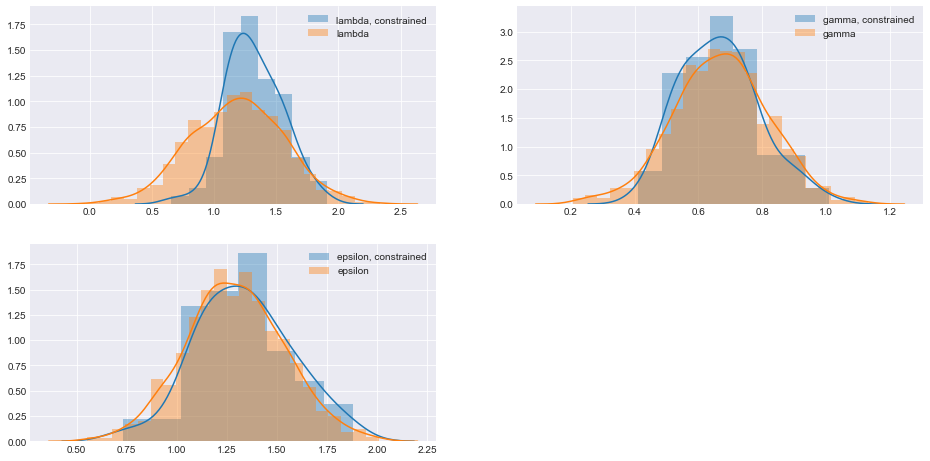

In [34]:
# do the same for feedback parameters

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16,8)

fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.distplot(lam_norm[constrained_2], label='lambda, constrained')
sns.distplot(lam_norm, label='lambda')

ax2 = fig.add_subplot(222)
sns.distplot(gam_norm[constrained_2], label='gamma, constrained')
sns.distplot(gam_norm, label='gamma')

ax3 = fig.add_subplot(223)
sns.distplot(eps_norm[constrained_2], label='epsilon, constrained');
sns.distplot(eps_norm, label='epsilon');

ax1.legend()
ax2.legend()
ax3.legend();


In [35]:
# convert lambda and gamma to ECS and TCR

TCR_c = (3.71*scale_norm[constrained_2,0])/(lam_norm[constrained_2] + gam_norm[constrained_2])
TCR = (3.71*scale_norm[:,0])/(lam_norm + gam_norm)             

ECS_c = (3.71*scale_norm[constrained_2,0])/lam_norm[constrained_2]
ECS = (3.71*scale_norm[:,0])/lam_norm

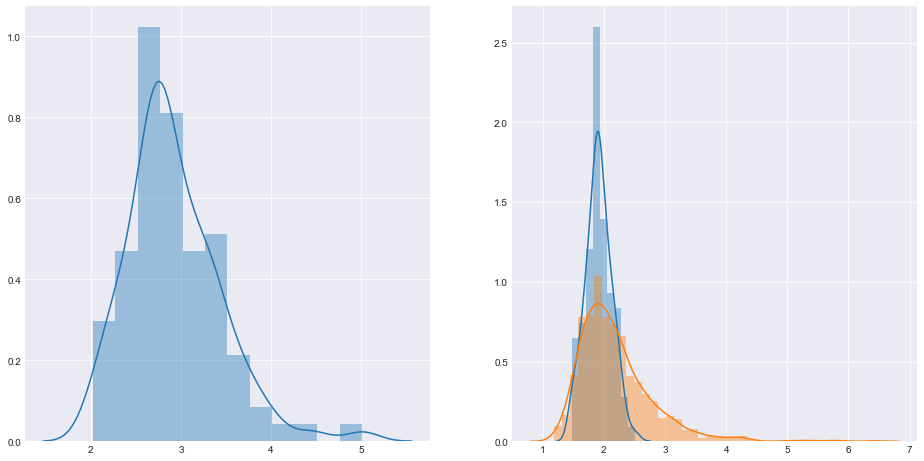

In [36]:
# take a look at ECS and TCR distributions

plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16,8)

fig = plt.figure()

ax1 = fig.add_subplot(121)
sns.distplot(ECS_c, label='ECS, constrained')
# sns.distplot(ECS, label='ECS')

ax2 = fig.add_subplot(122)
sns.distplot(TCR_c, label='TCR, constrained')
sns.distplot(TCR, label='TCR');


In [37]:
n = np.sum(constrained_2)

array = np.ndarray((n, 2))
array[:,0] = F[253, 8, constrained_2]
array[:,1] = ECS_c

df = pd.DataFrame(array, columns=['Aerosol forcing (W m-2)', 'ECS (K)'])

See if the model produces interesting relationships between variables using joint probability distributions. 1) ECS and aerosol forcing pairs, 2) TCR and aerosol forcing, and 3) ECS and epsilon

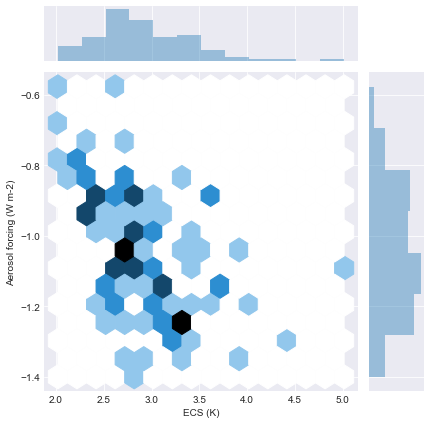

In [38]:
sns.jointplot(x="ECS (K)", y="Aerosol forcing (W m-2)", kind='hex', gridsize=15, data=df);

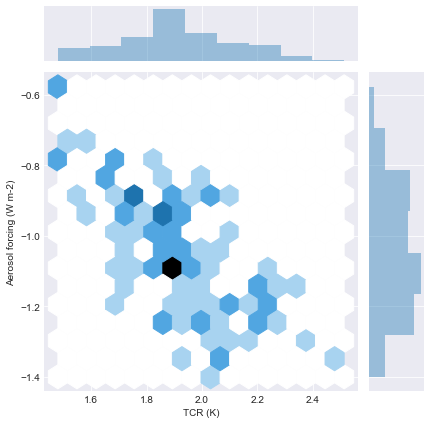

In [39]:
n = np.sum(constrained_2)

array = np.ndarray((n, 2))
array[:,0] = F[253, 8, constrained_2]
array[:,1] = TCR_c

df = pd.DataFrame(array, columns=['Aerosol forcing (W m-2)', 'TCR (K)'])

sns.jointplot(x="TCR (K)", y="Aerosol forcing (W m-2)", kind='hex', gridsize=15, data=df);

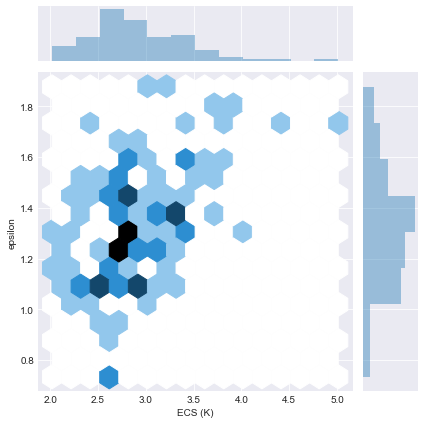

In [40]:
array = np.ndarray((n, 2))
array[:,0] = eps_norm[constrained_2]
array[:,1] = ECS_c

df = pd.DataFrame(array, columns=['epsilon', 'ECS (K)'])

sns.jointplot(x="ECS (K)", y="epsilon", kind='hex', gridsize=15, data=df);